<a href="https://colab.research.google.com/github/anandra-1/Personal_Loan_Campaign/blob/main/Personal_Loan_Campaign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user


**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [ ]:
# to load and manipulate data
import pandas as pd
import numpy as np

# to visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# to split data into training and test sets
from sklearn.model_selection import train_test_split

# to build decision tree model
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn import tree
from sklearn import metrics

# to tune different models
from sklearn.model_selection import GridSearchCV

# to compute classification metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score,
)

## Loading the dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# read the data from foodhub_order.csv file
df=pd.read_csv("/content/drive/MyDrive/PG_ML_AI/Projects/Loan_Modelling.csv")

In [ ]:
#Copy dataframe
data=df.copy()

## Data Overview

* Observations
* Sanity checks

In [ ]:
# First 5 rows of dataset
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# to get the rows and columns
df.shape

(5000, 14)

In [ ]:
# Metadata of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
# To identify any missing values in the data
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIPCode,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal_Loan,0


In [ ]:
# Statistical Summary of the numerical data and transpose for better format
data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
# check for duplicate data
data.duplicated().sum()

np.int64(0)

In [ ]:
data['ID'].nunique()

5000

#### Observation:
* No Duplicate data
* 14 Columns out which 13 are int64 and 1 column (CCAvg) which is float64
* Total 5000 records or unique customers
* No missing values in all the columns
* Customer's age is between 23 and 67 and average age is 45
* Customer's salaray ranges from 8000 to 224,000 dollars and Average customer salary is 64,000 dollars.
* Minimum Experience is -3 which needs more analysis, maximum experience is 43 years and average experience is 20 years.

In [ ]:
# Count of experince less than zero
data[data.Experience <0].shape[0]

52

In [ ]:
#imputing experience values that are lessthan 0 with absolute value
data.loc[data['Experience']<0,'Experience']=np.abs(data['Experience'])

In [ ]:
# Checking again if dataset have experience < 0
data[data.Experience <0].shape[0]

0

In [ ]:
data.groupby(['Family']).agg(count=('Family',"count"),
                             ).reset_index()

,Family,count
0,1,1472
1,2,1296
2,3,1010
3,4,1222


In [ ]:
# Getting the count and Percentage
features=['Family','Education','Securities_Account','CD_Account','Online','CreditCard']
for i, feature in enumerate(features):
    print(pd.DataFrame({
    'Count': data[feature].value_counts(),
    'Percentage': data[feature].value_counts(normalize=True) * 100}))
    print('-------------------------------------')

        Count  Percentage
Family                   
1        1472       29.44
2        1296       25.92
4        1222       24.44
3        1010       20.20
-------------------------------------
           Count  Percentage
Education                   
1           2096       41.92
3           1501       30.02
2           1403       28.06
-------------------------------------
                    Count  Percentage
Securities_Account                   
0                    4478       89.56
1                     522       10.44
-------------------------------------
            Count  Percentage
CD_Account                   
0            4698       93.96
1             302        6.04
-------------------------------------
        Count  Percentage
Online                   
1        2984       59.68
0        2016       40.32
-------------------------------------
            Count  Percentage
CreditCard                   
0            3530        70.6
1            1470        29.4
-------------

### Observation:
*  30% of customers have family size of 1 or single, 26% have family size 2, 20% have family size 3, 24% have family size 4

*  42% of customers are undergrad, 28% of customers are Graduated and 30% of customers are Advanced/Professional.

*  ~90% of the customer dont have Securities Account and only 10% of customers have Securities Account.

*  94% of customers dont have certificate of deposit and only 6% of the customers have

*  ~60% of customers use internet banking facilities and 40% dont use internet facilities.

*  ~70% of customers dont have credit card and 30% of customer have credit card.

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

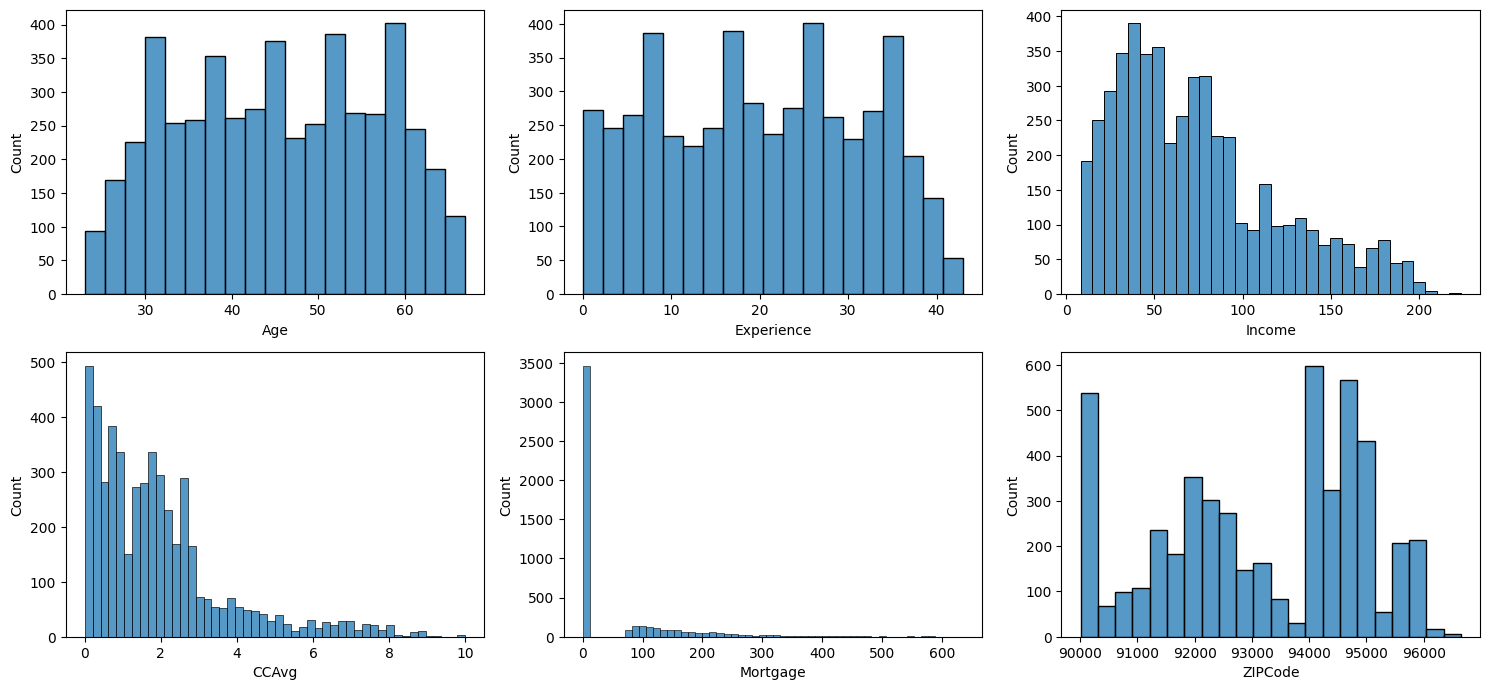

In [ ]:
# Getting the histplot for Age,Experience,Income,CCAvg,Mortgage,ZIPCode
# defining the figure size
plt.figure(figsize=(15, 10))
features=['Age','Experience','Income','CCAvg','Mortgage','ZIPCode']
# plotting the histplot for feature
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=data, x=feature)
plt.tight_layout()
plt.show();   # to add spacing between plots

In [ ]:
#Mortgage  count and percentage
df_pl_mrtg=data[["Personal_Loan","Mortgage"]].copy()
df_pl_mrtg["Mortgage_flag"] = df_pl_mrtg["Mortgage"].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
pd.DataFrame({
    'Count': df_pl_mrtg['Mortgage_flag'].value_counts(),
    'Percentage': df_pl_mrtg['Mortgage_flag'].value_counts(normalize=True) * 100})

,Count,Percentage
Mortgage_flag,,
0,3462,69.24
1,1538,30.76


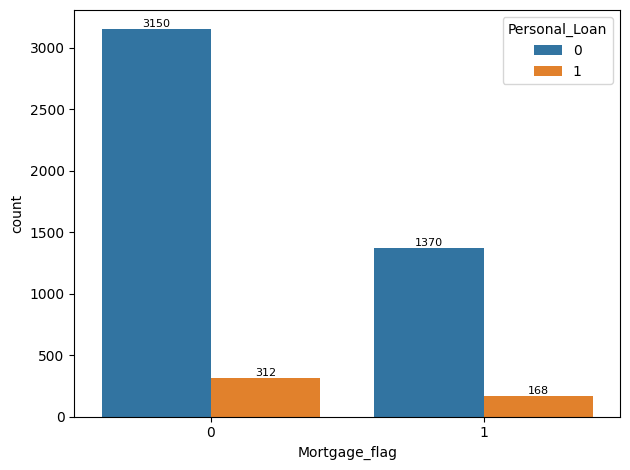

In [ ]:
#Mortgage Loan vs personal loan plot
ax_mrtg = sns.countplot(data=df_pl_mrtg, x='Mortgage_flag', hue='Personal_Loan')
for p in ax_mrtg.patches:
  height = p.get_height()
  if height > 0:
    ax_mrtg.annotate(f'{int(height)}',(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show();

plt.figure(figsize=(8,5))
df_new=data.groupby(["cuisine_type","day_of_the_week"])["cost_of_the_order"].sum().reset_index()
sns.barplot(data=df_new.sort_values("cost_of_the_order",ascending=False),x='cuisine_type',y='cost_of_the_order',hue='day_of_the_week')
plt.xticks(rotation=90);

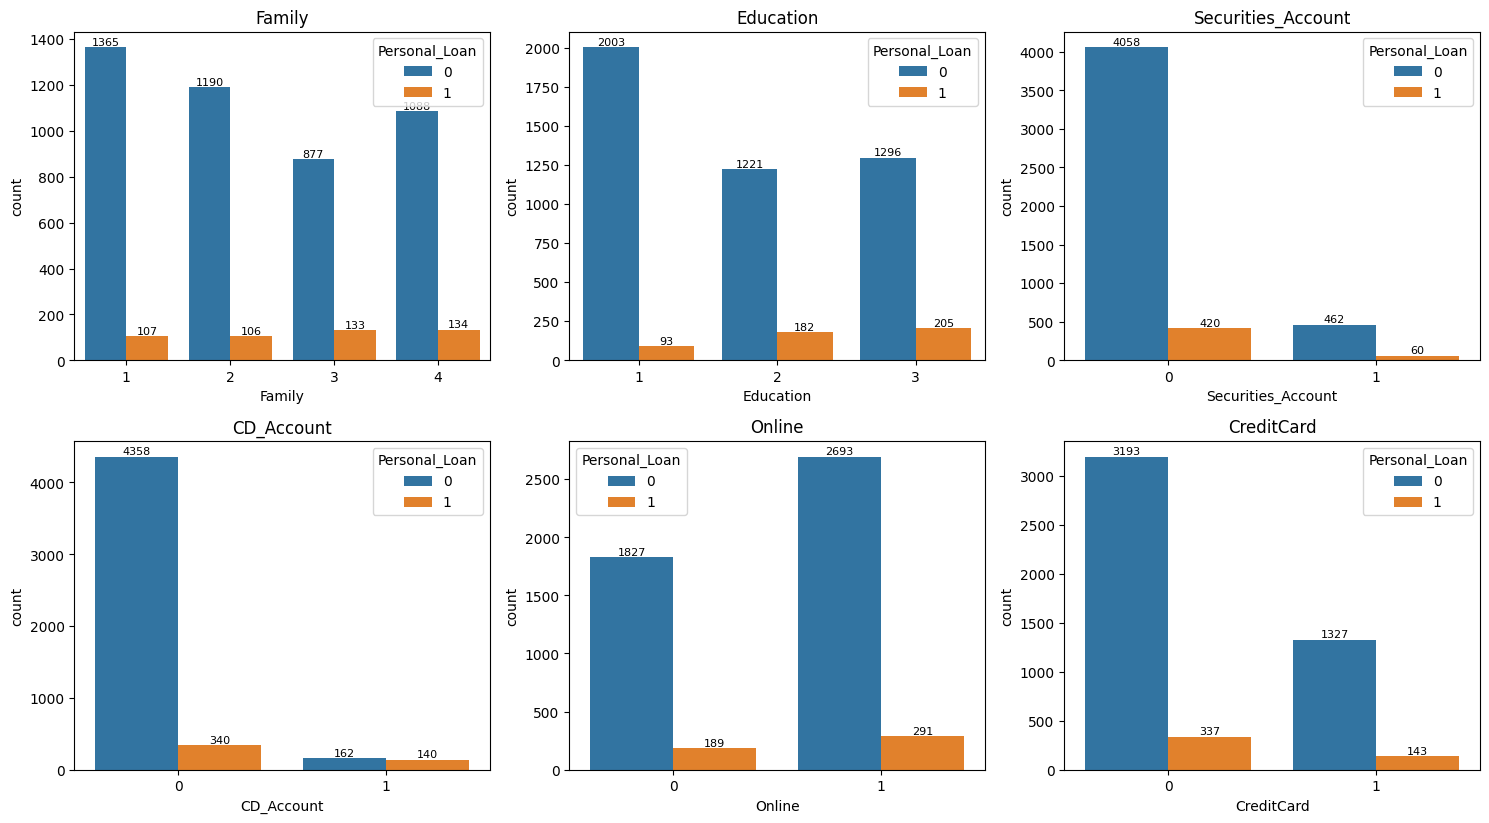

In [ ]:
# plotting the Countplot for each numerical feature

# defining the figure size
plt.figure(figsize=(15, 12))
features=['Family','Education','Securities_Account','CD_Account','Online','CreditCard']

for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    plt.title(feature)

    ax = sns.countplot(data=data, x=feature, hue='Personal_Loan')

    # Add count labels
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}',
                        (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show();

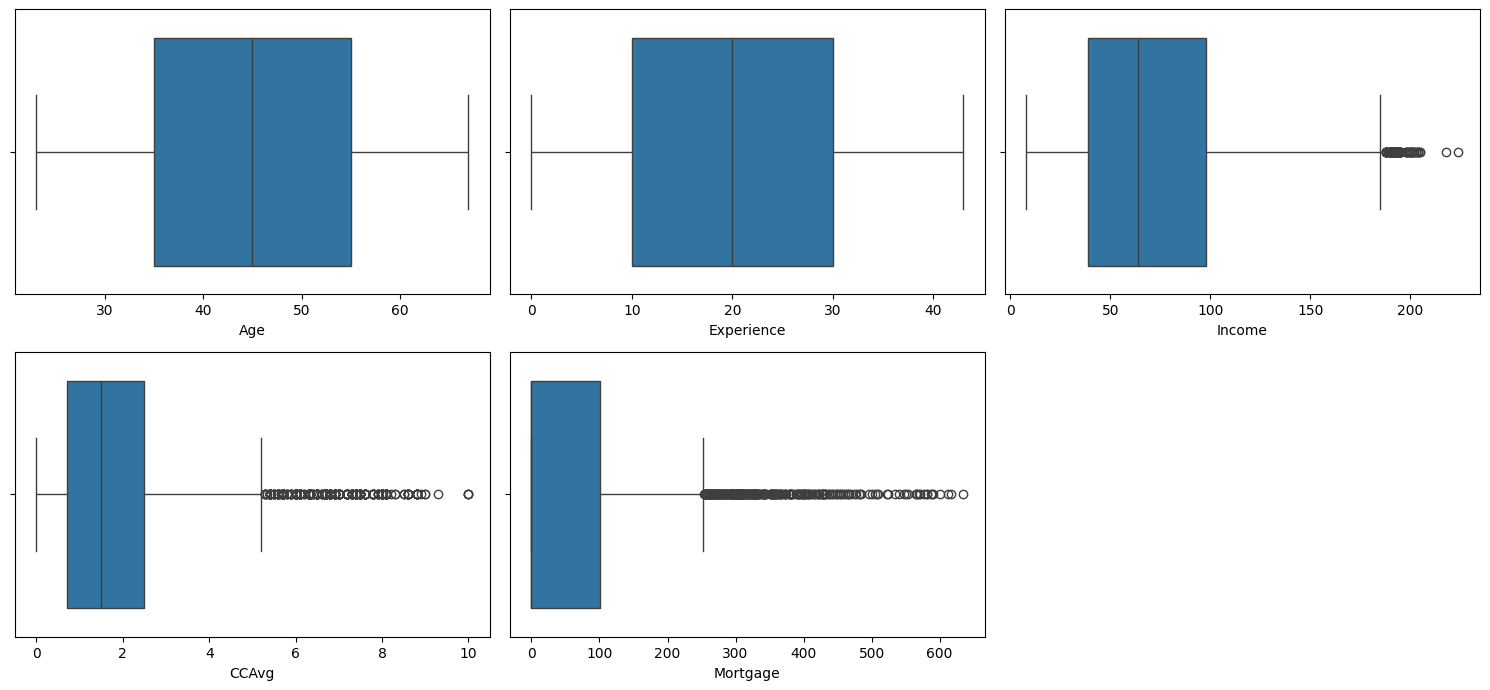

In [ ]:
# plotting the Barplot for other feature
# defining the figure size
plt.figure(figsize=(15, 10))
features=['Age','Experience','Income','CCAvg','Mortgage']
# plotting the boxplot for each numerical feature
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=data, x=feature)    # Plot boxplot for the feature

plt.tight_layout();   # to add spacing between plots

#### Observation:
* Age & Experience: Both are symmetrically distributed and No significant outliers visible.

* Income: Right-skewed distribution. A few outliers (very high-income values above ~200).

* CCAvg (Credit Card Average Spend): Many outliers beyond the upper whisker (~3K+).Skewed to the right — many users spend significantly more than average.

* Mortgage: Highly right-skewed. Numerous outliers — some customers have mortgage values >500.

* Income, CCAvg and Mortgage are having outliers which are valid ones and no needs to be treated.

<Axes: xlabel='CCAvg'>

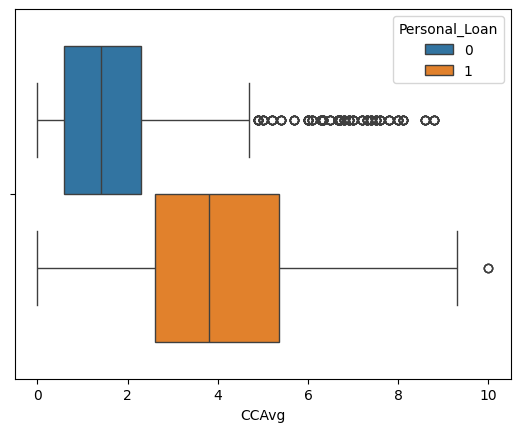

In [ ]:
sns.boxplot(data=data, x='CCAvg',hue='Personal_Loan')

* Customers with no Personal Loan are having lower CCAvg and its skewed right with outliers.
* Where as the Customer with Personal Loan is distributed symmentrically for CCAvg with one outlier around 10K.

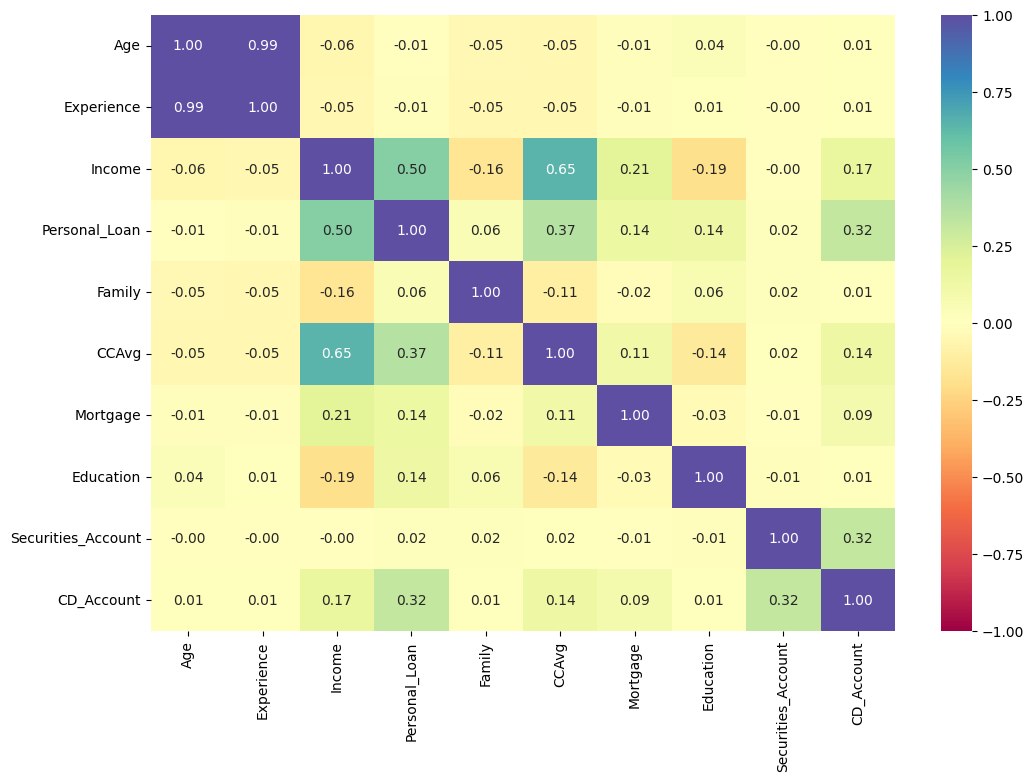

In [ ]:
#Plotting corelation matrix
correlation_matrix = data[['Age', 'Experience', 'Income', 'Personal_Loan','Family','CCAvg', 'Mortgage', 'Education','Securities_Account','CD_Account']].corr()

# defining the size of the plot
plt.figure(figsize=(12, 8))

# plotting the heatmap for correlation
sns.heatmap(correlation_matrix,annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral");

#### Observation:
* Education and Age are highly positively corelated with 0.99.
* Personal Loan is modetrately corelated to CCAvg, CD_Account.
* Income is positive coorelated with CCAvg and personal loan with correlation of 0.65 and 0.55 respectively.

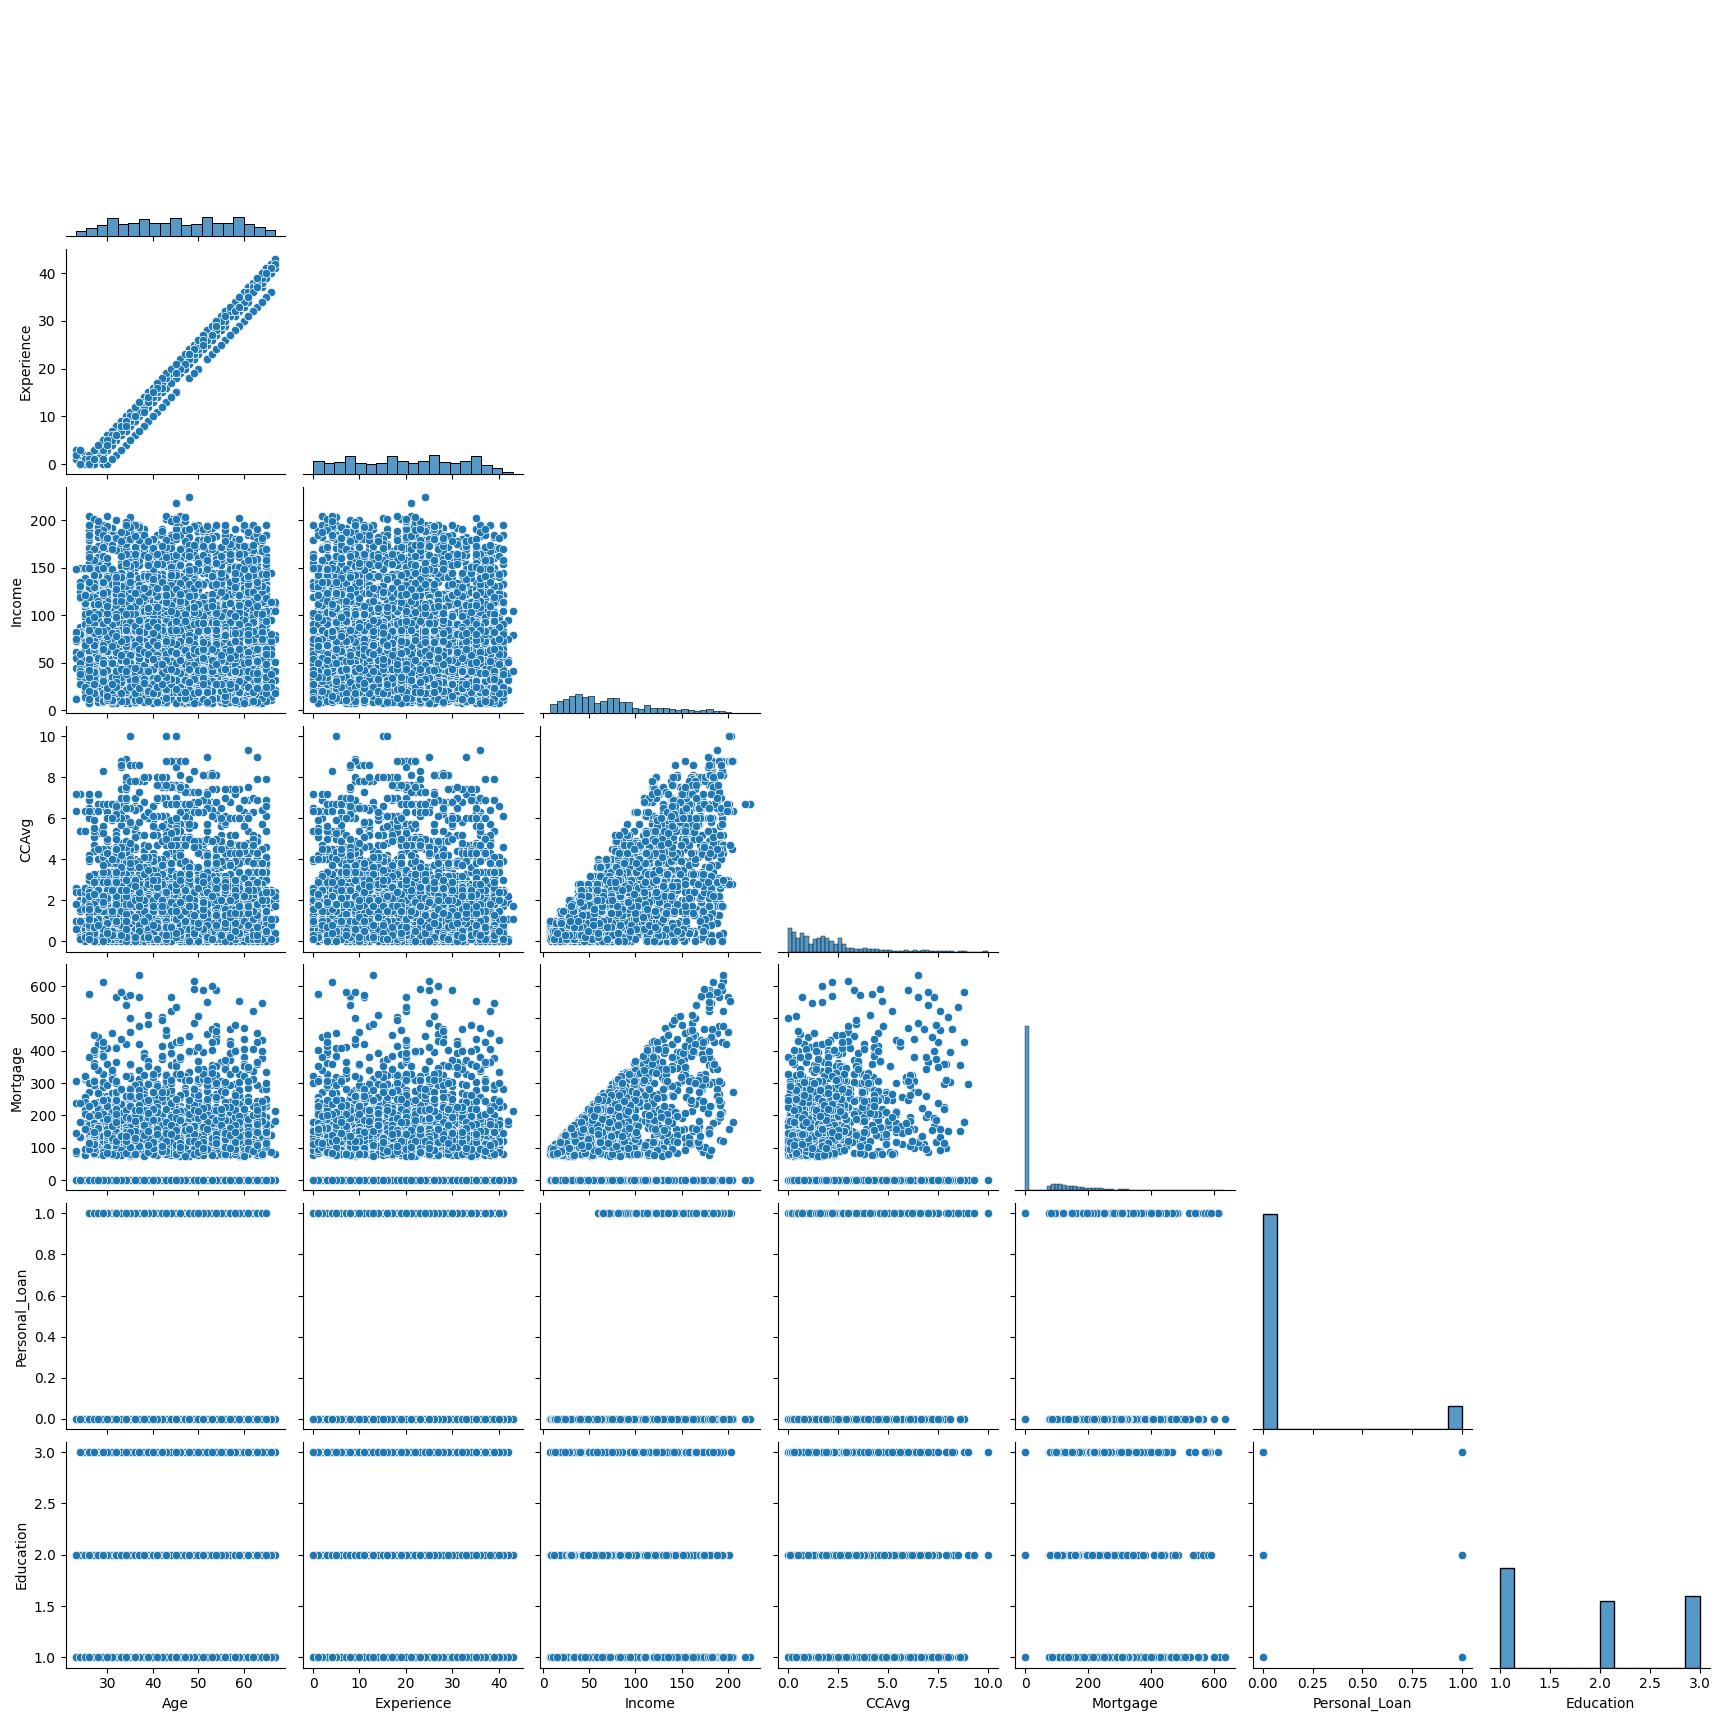

In [ ]:
#plotting Pair plot
attributes=['Age', 'Experience', 'Income','CCAvg', 'Mortgage','Personal_Loan','Education']

sns.pairplot(data=data,vars=attributes,corner=True);

In [ ]:
# Total number of rows
total_count = len(data)

# Group and count
grouped = (data.groupby(['Education', 'Personal_Loan']).size().reset_index(name='Count'))

# Calculate percentage over the total
grouped['Percentage'] = (grouped['Count'] / total_count) * 100

grouped

,Education,Personal_Loan,Count,Percentage
0,1,0,2003,40.06
1,1,1,93,1.86
2,2,0,1221,24.42
3,2,1,182,3.64
4,3,0,1296,25.92
5,3,1,205,4.10


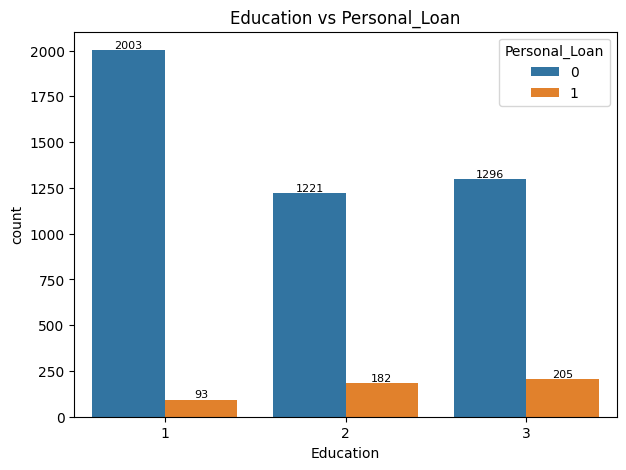

In [ ]:
#Plotting Education with Personal Loan
plt.figure(figsize=(7,5))
plt.title('Education vs Personal_Loan')
ax = sns.countplot(data=data, x='Education',hue='Personal_Loan')
# Add count labels
for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.annotate(f'{int(height)}',
     (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)
plt.xlabel('Education');

#### Observation:
Customers who are more educated seems to be more willing to take a Personal Loan.


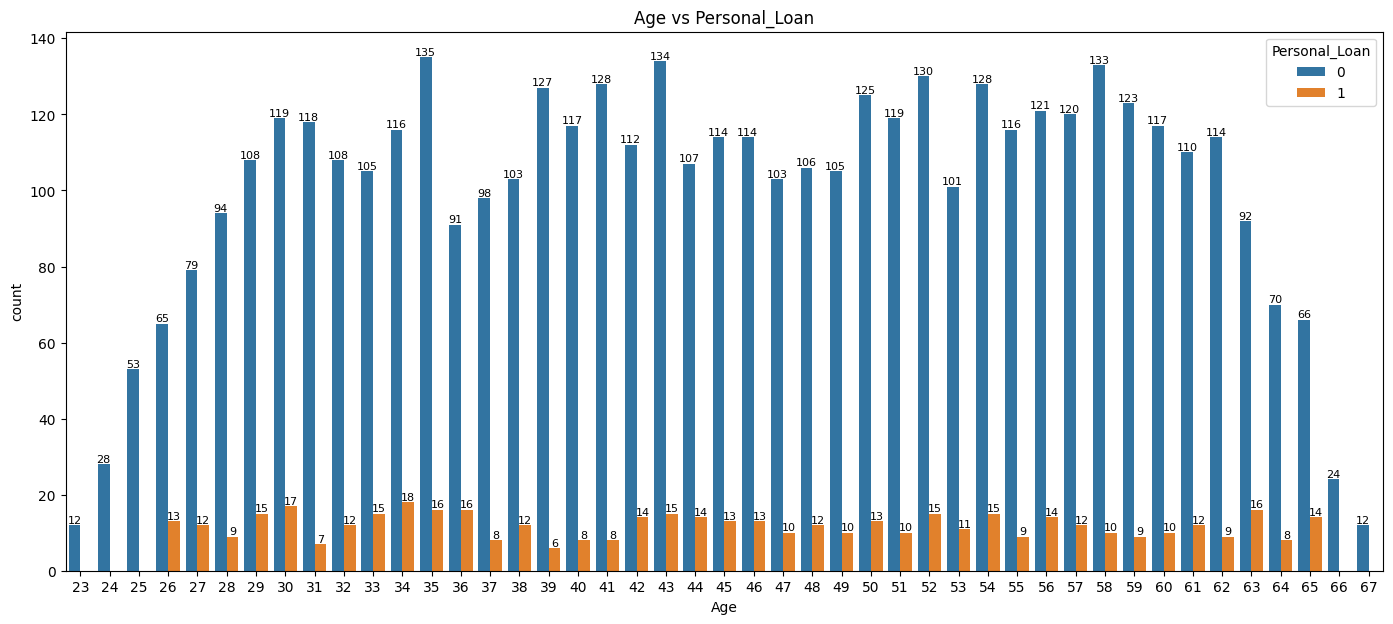

In [ ]:
#ploting Age with persoanl loan
plt.figure(figsize=(17,7))
plt.title('Age vs Personal_Loan')
ax=sns.countplot(data=data, x='Age',hue='Personal_Loan')
for p in ax.patches:
  height = p.get_height()
  if height > 0:
    ax.annotate(f'{int(height)}',
     (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)
plt.xlabel('Age')
plt.show();

#### Observation:

* (Ans 1) Mortgage attribute has a very right highly skewed distribution and lot of outliners which are valid ones.
* (Ans 2) 1470 customers have credit cards
* (Ans 3) Personal_Loan attribute had the highest correlation with
   1. Income
   2. CCAvg
   3. CD_Account

* (Ans 4) The customer's age donot influence the applying for personal loan. Customers of all age categories did not apply for the persoanl loan is significantly higher than the customers who did.Customers under age 26 and above 65 categories have a very low probability of applying personal loan.
* (Ans 5) The value 0.14 (Education and Personal_loan) is having very weak positive linear relationship.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

#### Outlier Detection

In [ ]:
#Calculating the Outliner
Quantile1 = data.select_dtypes(include=["float64", "int64"]).quantile(0.25)  # To find the 25th percentile and 75th percentile.
Quantile3 = data.select_dtypes(include=["float64", "int64"]).quantile(0.75)

IQR = Quantile3 - Quantile1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Quantile1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Quantile3 + 1.5 * IQR

((data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
ID,0.00
Age,0.00
Experience,0.00
Income,1.92
ZIPCode,0.00
Family,0.00
CCAvg,6.48
Education,0.00
Mortgage,5.82
Personal_Loan,9.60


##### Observations:

* There are outliers in income,CCAvg and Mortgage and they are all valid values. So no need to treat them.

#### Data Preparation

Already we have addressed the anomalous values in Experience feature

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
# getting first 2 number of Zipcode
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
data.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91,4,1.0,2,0,0,0,0,0,1


#### Create dummy varaiable

In [ ]:
#Creating dummy varaiables for Zipcode and Education feature
data = pd.get_dummies(data, columns=['ZIPCode','Education'], drop_first=True)

In [ ]:
#Converting to Float datatype
data = data.astype(float)

In [ ]:
data.head()

,ID,Age,Experience,Income,Family,CCAvg,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Education_2,Education_3
0,1.0,25.0,1.0,49.0,4.0,1.6,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,3.0,1.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,1.0,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,5.0,35.0,8.0,45.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


#### Split Data into Train and Test

In [ ]:
# defining the dependent and independent variables
# dropping Personal_Loan as this is the dependent variable we want our model to predict
# dropping Experience as it is perfectly correlated with Age, so it wouldn't really add any more value than what Age would add.
X = data.drop(['Personal_Loan','Experience','ID'],axis=1)
Y = data['Personal_Loan']

# splitting the data in 70:30 ratio for train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,stratify=Y, random_state=42)

In [ ]:
#Diaplying the rows and columns for train and test dataset
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0.0    0.904
1.0    0.096
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0.0    0.904
1.0    0.096
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = metrics.accuracy_score(target, pred)  # to compute Accuracy
    recall = metrics.recall_score(target, pred)  # to compute Recall
    precision = metrics.precision_score(target, pred)  # to compute Precision
    f1 = metrics.f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame({"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1}, index=[0])

    return df_perf

In [ ]:
# defining a function to Confusion matrix
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = metrics.confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Model Building

In [ ]:
# Create decision tree named dTree and fit our train data into it, for the model to learn from.
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=42)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# to check the classification metrics on train set
dtree_train_perf = model_performance_classification(dtree, X_train, y_train)
dtree_train_perf

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [ ]:
# to check the classification metrics on test set
dtree_test_perf = model_performance_classification(dtree, X_test, y_test)
dtree_test_perf

,Accuracy,Recall,Precision,F1
0,0.979333,0.895833,0.889655,0.892734


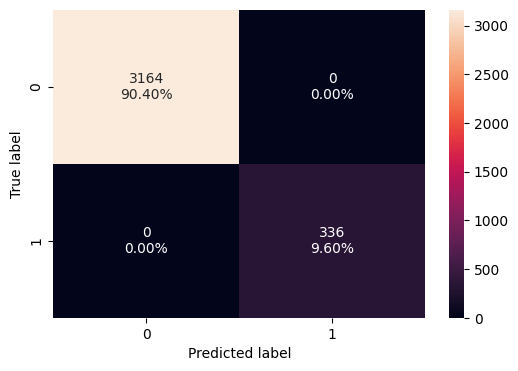

In [ ]:
# to create Confuction matrix for train set
confusion_matrix_sklearn(dtree, X_train, y_train)

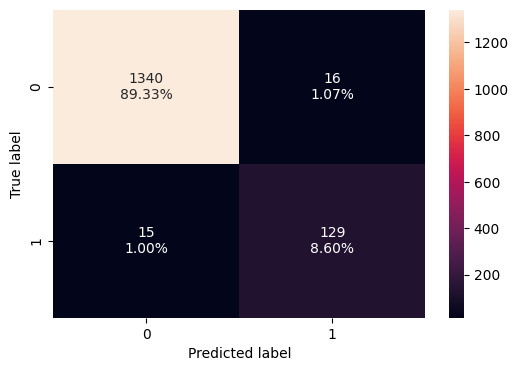

In [ ]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dtree, X_test, y_test)

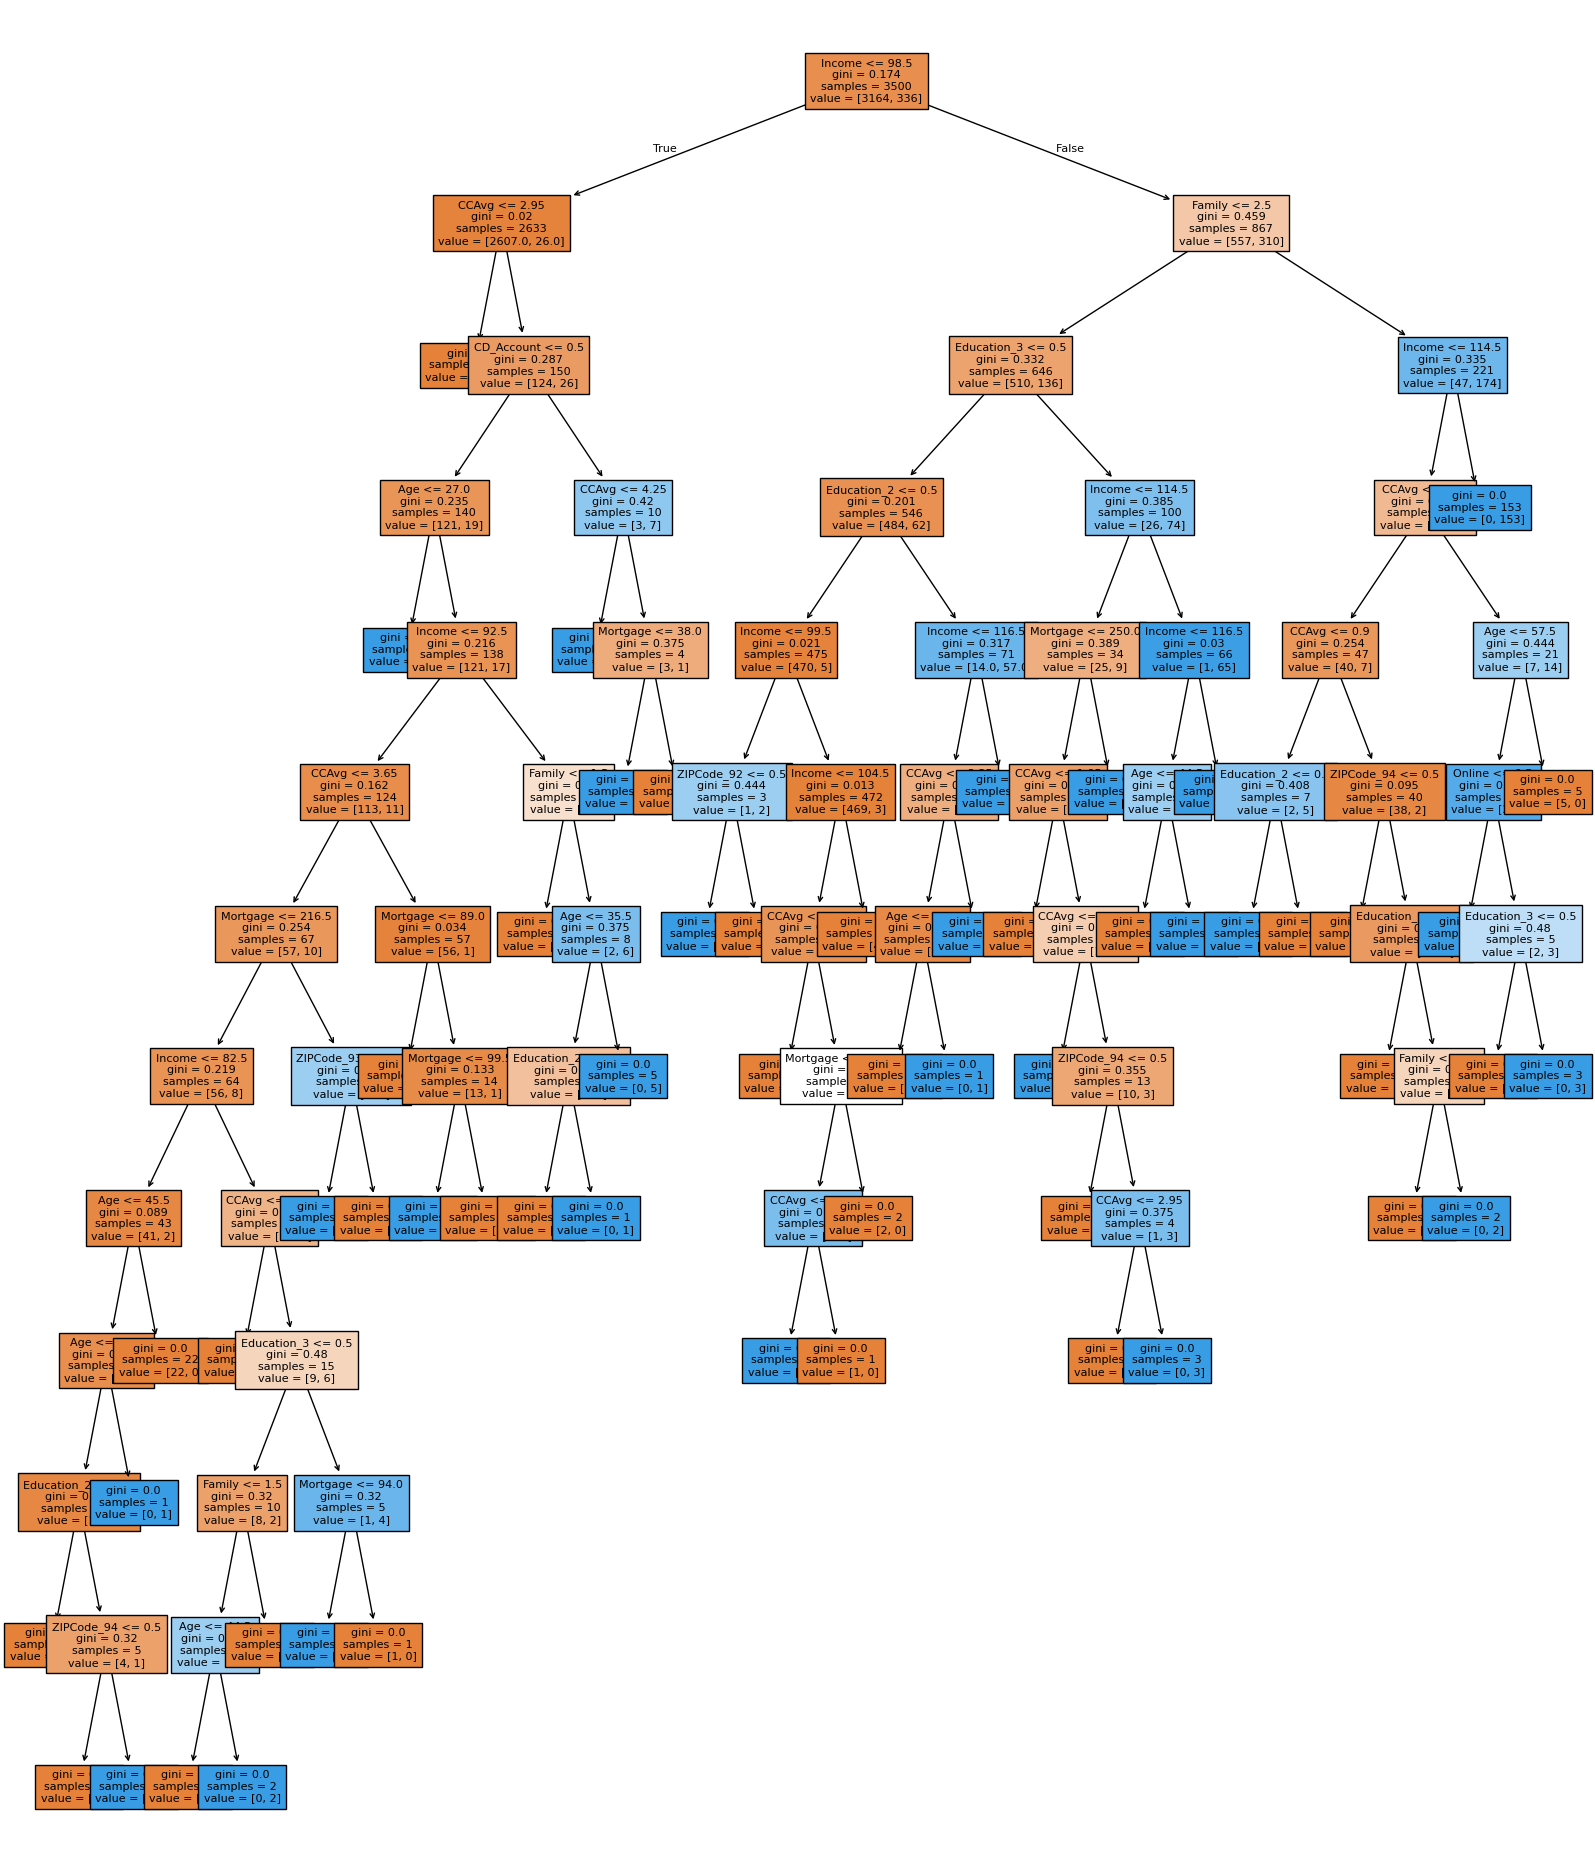

In [ ]:
# visualize the tree
feature_names = list(X_train.columns)

plt.figure(figsize=(20, 24))
out = tree.plot_tree(dtree, feature_names=feature_names, filled=True, fontsize=8, node_ids=False, class_names=None)

# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

                         Imp
Income              0.410793
Family              0.193739
Education_2         0.136578
Education_3         0.117101
CCAvg               0.069894
Age                 0.027949
Mortgage            0.019431
CD_Account          0.009784
ZIPCode_94          0.008530
ZIPCode_93          0.002195
ZIPCode_92          0.002195
Online              0.001811
Securities_Account  0.000000
CreditCard          0.000000
ZIPCode_91          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


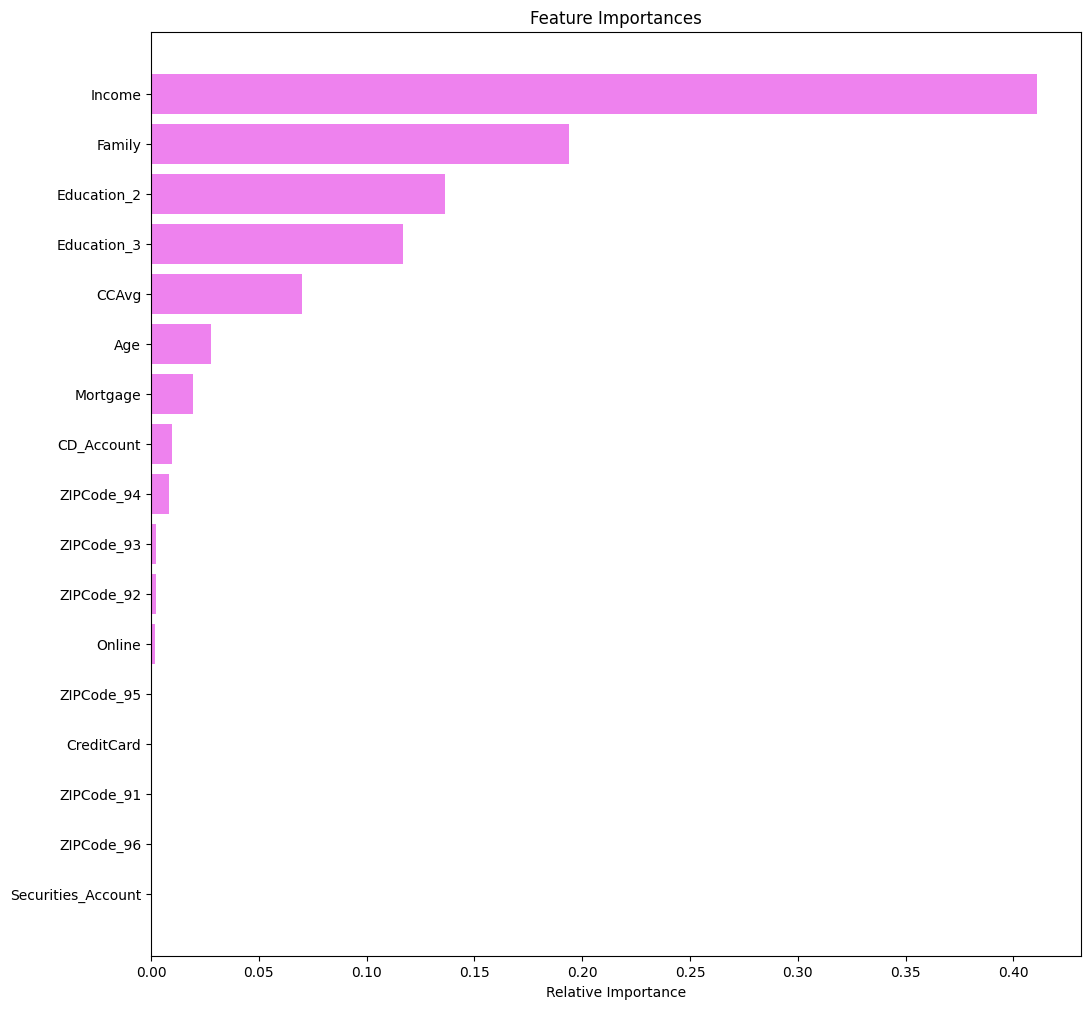

In [ ]:
# Gini Importance is the importance of a feature, which is normalized total reduction of the criterion brought by that feature.
print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Visualization of Gini importance for different features used in the model
importances = dtree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0.0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- Age <= 27.00
|   |   |   |   |--- weights: [0.00, 2.00] class: 1.0
|   |   |   |--- Age >  27.00
|   |   |   |   |--- Income <= 92.50
|   |   |   |   |   |--- CCAvg <= 3.65
|   |   |   |   |   |   |--- Mortgage <= 216.50
|   |   |   |   |   |   |   |--- Income <= 82.50
|   |   |   |   |   |   |   |   |--- Age <= 45.50
|   |   |   |   |   |   |   |   |   |--- Age <= 43.50
|   |   |   |   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- weights: [15.00, 0.00] class: 0.0
|   |   |   |   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |--- Age >  43.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1.0
|   |   |   |   |   |   |   |   |--- Ag

## Model Performance Improvement

### Pre-Pruning

In [ ]:
# define the parameters of the tree to iterate over
max_depth_values = np.arange(2, 11, 2)
max_leaf_nodes_values = np.arange(10, 51, 10)
min_samples_split_values = np.arange(10, 51, 10)

# initialize variables to store the best model and its performance
best_estimator = None
best_score_diff = float('inf')

# iterate over all combinations of the specified parameter values
for max_depth in max_depth_values:
    for max_leaf_nodes in max_leaf_nodes_values:
        for min_samples_split in min_samples_split_values:

            # initialize the tree with the current set of parameters
            estimator = DecisionTreeClassifier(
                max_depth=max_depth,
                max_leaf_nodes=max_leaf_nodes,
                min_samples_split=min_samples_split,
                random_state=42
            )

            # fit the model to the training data
            estimator.fit(X_train, y_train)

            # make predictions on the training and test sets
            y_train_pred = estimator.predict(X_train)
            y_test_pred = estimator.predict(X_test)

            # calculate F1 scores for training and test sets
            train_f1_score = f1_score(y_train, y_train_pred)
            test_f1_score = f1_score(y_test, y_test_pred)

            # calculate the absolute difference between training and test F1 scores
            score_diff = abs(train_f1_score - test_f1_score)

            # update the best estimator and best score if the current one has a smaller score difference
            if score_diff < best_score_diff:
                best_score_diff = score_diff
                best_estimator = estimator

In [ ]:
# creating an instance of the best model
dtree_preprun = best_estimator

# fitting the best model to the training data
dtree_preprun.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=np.int64(4), max_leaf_nodes=np.int64(10),
                       min_samples_split=np.int64(10), random_state=42)

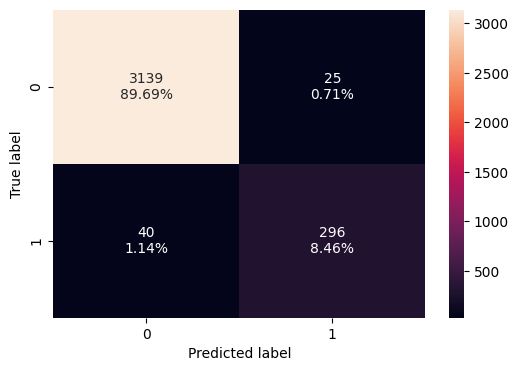

In [ ]:
# to create a confusion matrix for train set
confusion_matrix_sklearn(dtree_preprun, X_train, y_train)

In [ ]:
# to check the classification metrics on train set
dtree_preprun_train_perf= model_performance_classification(dtree_preprun, X_train, y_train)
dtree_preprun_train_perf

,Accuracy,Recall,Precision,F1
0,0.981429,0.880952,0.922118,0.901065


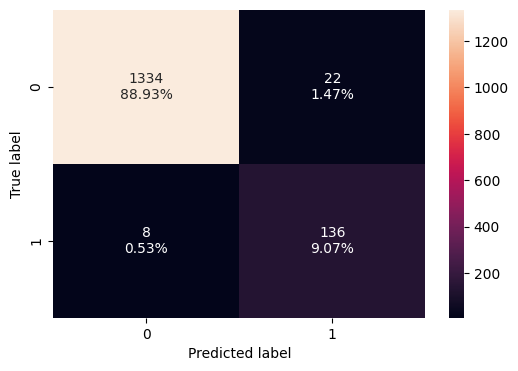

In [ ]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dtree_preprun, X_test, y_test)

In [ ]:
# to check the classification metrics on test set
dtree_preprun_test_perf= model_performance_classification(dtree_preprun, X_test, y_test)
dtree_preprun_test_perf

,Accuracy,Recall,Precision,F1
0,0.98,0.944444,0.860759,0.900662


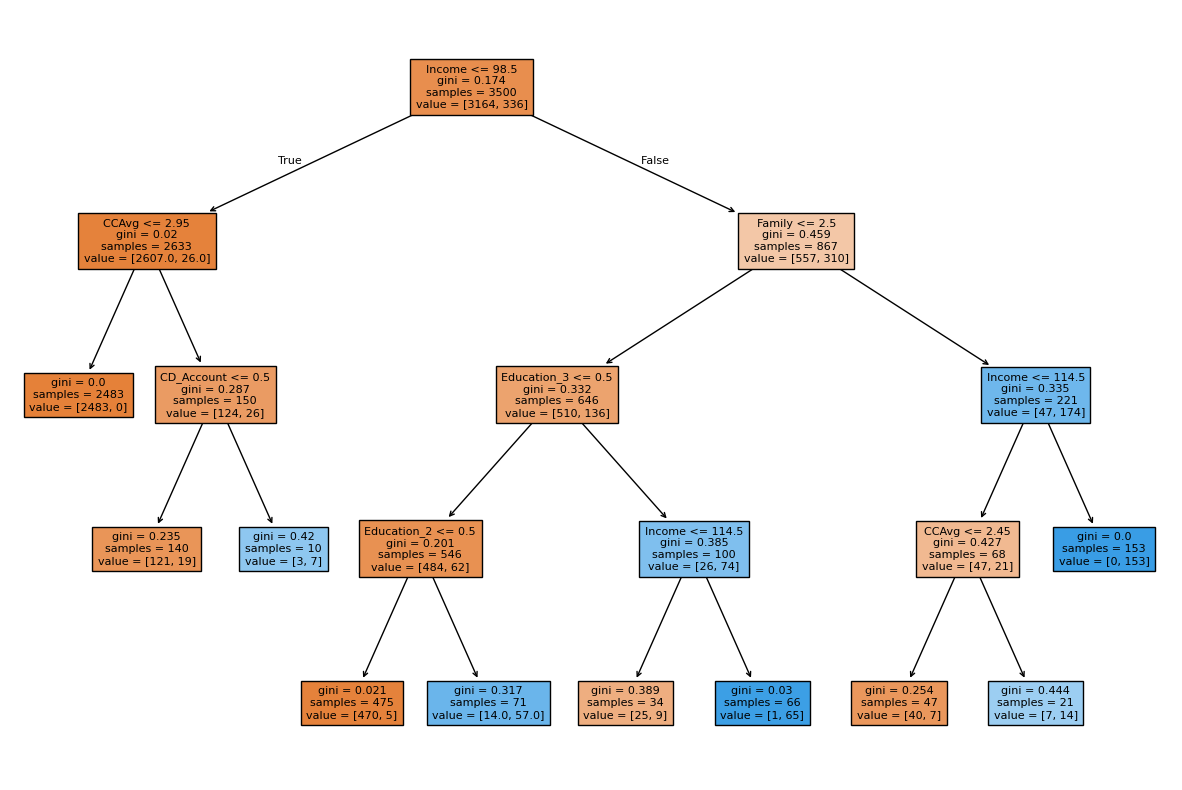

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size of the plot
plt.figure(figsize= (15,10))

# plotting the decision tree
out= tree.plot_tree(dtree_preprun, # decision tree classifier model
    feature_names= feature_names, #list of features names(columns) in the dataset
    class_names= None,
    filled= True, #fill the nodes with colors based on class
    fontsize= 8, node_ids= False
)
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree_preprun,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0.0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [121.00, 19.00] class: 0.0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 7.00] class: 1.0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [470.00, 5.00] class: 0.0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [14.00, 57.00] class: 1.0
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [25.00, 9.00] class: 0.0
|   |   |   |--- Income >  114.50
|   |   |   |   |--- weights: [1.00, 65.00] class: 1.0
|   |--- Family >  2.50
|   |   |--- Income <= 114.50
|   |   |   |--- CCAvg <= 2.45
|   |   |   |   |--- weights: [40.00, 7.00] class: 0.0
|   |   |   |--- CCAvg >  2.45
|   |   |   |   |--- weights: [7.00, 14.00] class: 1.0
|   |   |--- Inc

                         Imp
Income              0.450422
Family              0.218433
Education_2         0.154591
Education_3         0.132247
CCAvg               0.032457
CD_Account          0.011849
Age                 0.000000
Mortgage            0.000000
Securities_Account  0.000000
CreditCard          0.000000
Online              0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_94          0.000000
ZIPCode_93          0.000000
ZIPCode_96          0.000000
ZIPCode_95          0.000000


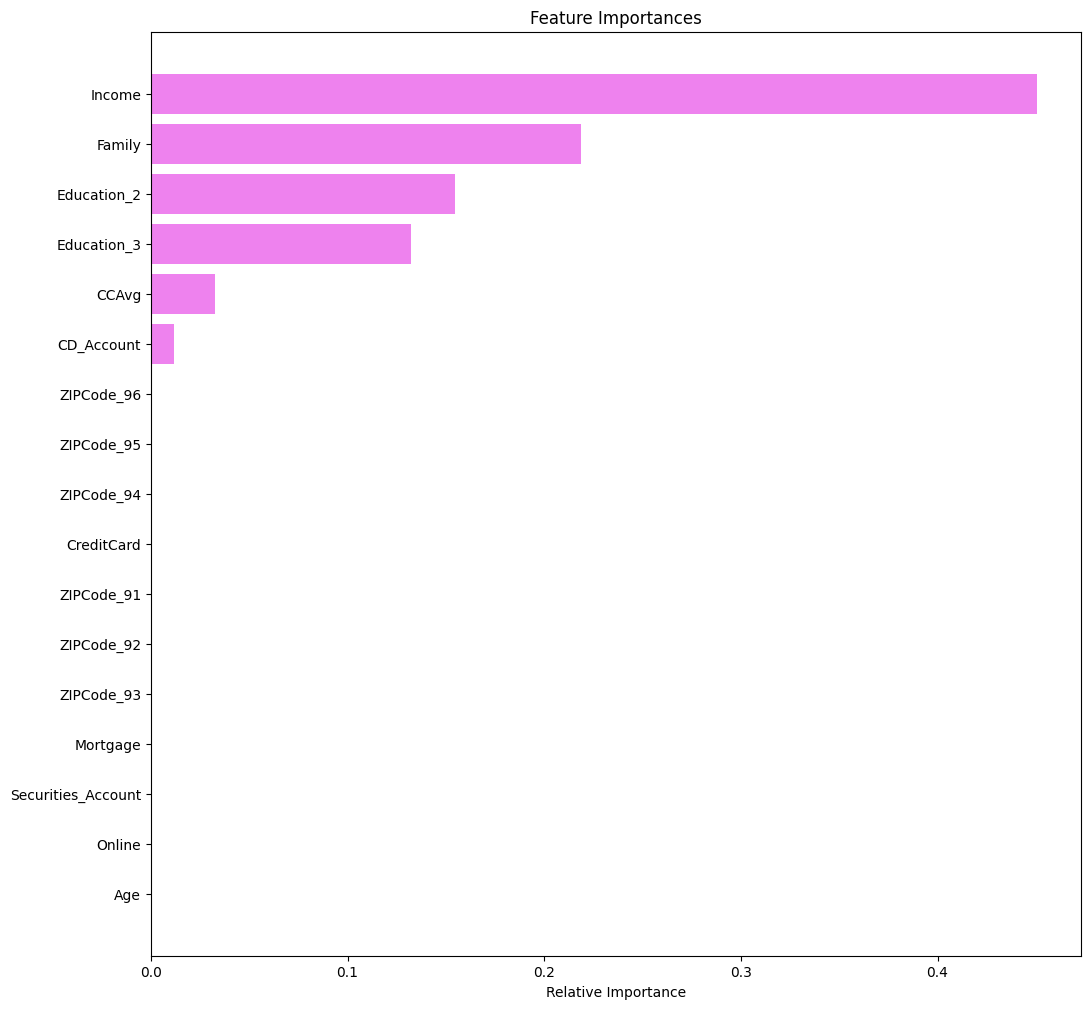

In [ ]:
# Gini Importance is the importance of a feature, which is normalized total reduction of the criterion brought by that feature.
print (pd.DataFrame(dtree_preprun.feature_importances_, columns = ["Imp"],
                    index = X_train.columns).sort_values(by = 'Imp', ascending = False))

# Visualization of Gini importance for different features used in the model
importances = dtree_preprun.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Post Pruning

In [ ]:
# Create an instance of the decision tree model
clf = DecisionTreeClassifier(random_state=42)

# Compute the cost complexity pruning path for the model using the training data
path = clf.cost_complexity_pruning_path(X_train, y_train)

# Extract the array of effective alphas from the pruning path
ccp_alphas = abs(path.ccp_alphas)

# Extract the array of total impurities at each alpha along the pruning path
impurities = path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000271,0.000543
2,0.000273,0.001090
3,0.000281,0.001651
4,0.000281,0.002214
5,0.000362,0.003300
6,0.000381,0.003681
7,0.000381,0.004061
8,0.000381,0.004442
9,0.000381,0.004823


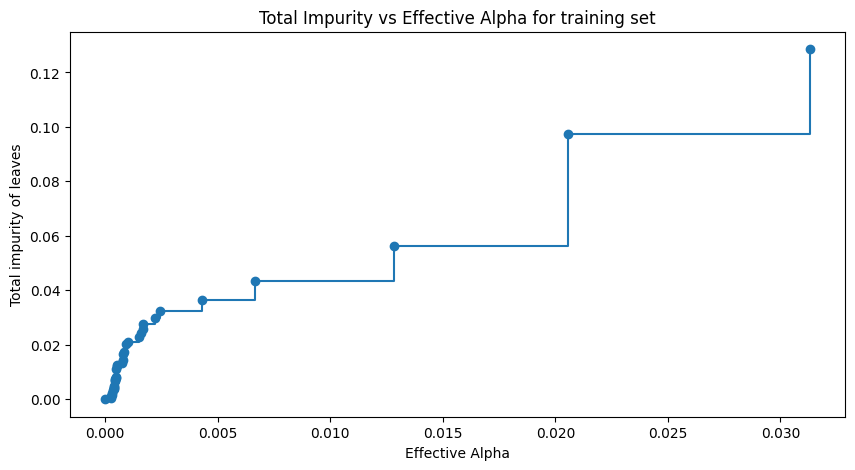

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the total impurities versus effective alphas, excluding the last value,
# using markers at each data point and connecting them with steps
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")

# Set the x-axis label
ax.set_xlabel("Effective Alpha")

# Set the y-axis label
ax.set_ylabel("Total impurity of leaves")

# Set the title of the plot
ax.set_title("Total Impurity vs Effective Alpha for training set");

In [ ]:
# Initialize an empty list to store the decision tree classifiers
clfs = []

# Iterate over each ccp_alpha value extracted from cost complexity pruning path
for ccp_alpha in ccp_alphas:
    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Append the trained classifier to the list
    clfs.append(clf)

# Print the number of nodes in the last tree along with its ccp_alpha value
print(
    "Number of nodes in the last tree is {} with ccp_alpha {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is 1 with ccp_alpha 0.04505298583544576


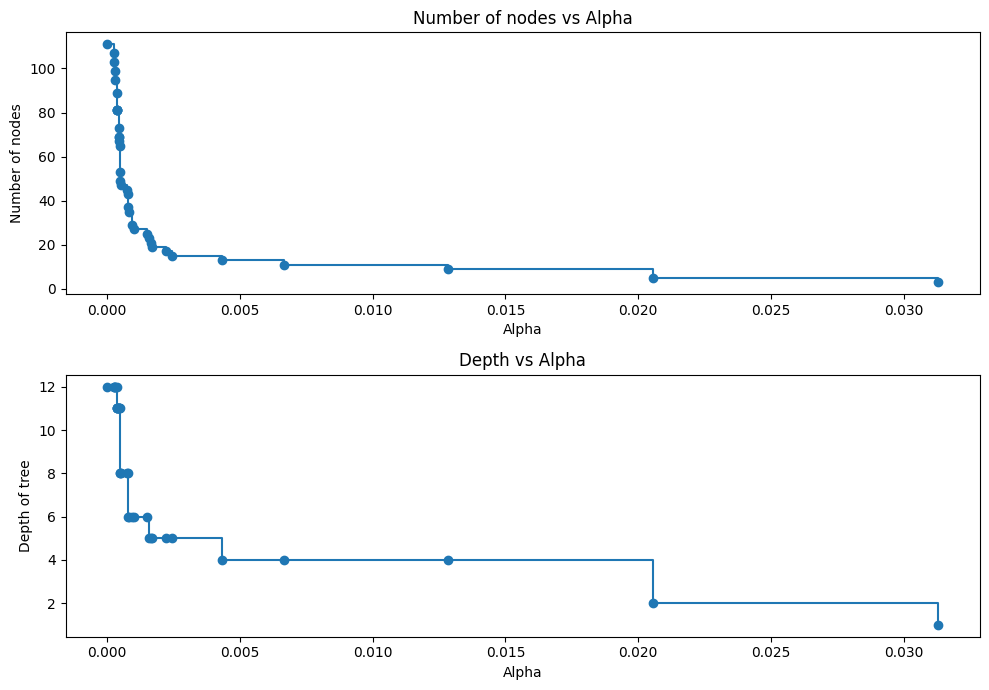

In [ ]:
# Remove the last classifier and corresponding ccp_alpha value from the lists
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Extract the number of nodes in each tree classifier
node_counts = [clf.tree_.node_count for clf in clfs]

# Extract the maximum depth of each tree classifier
depth = [clf.tree_.max_depth for clf in clfs]

# Create a figure and a set of subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 7))

# Plot the number of nodes versus ccp_alphas on the first subplot
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("Alpha")
ax[0].set_ylabel("Number of nodes")
ax[0].set_title("Number of nodes vs Alpha")

# Plot the depth of tree versus ccp_alphas on the second subplot
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("Depth of tree")
ax[1].set_title("Depth vs Alpha")

# Adjust the layout of the subplots to avoid overlap
fig.tight_layout()

In [ ]:
# Initialize an empty list to store F1 scores for training set for each decision tree classifier
train_f1_scores = []

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the training set using the current decision tree classifier
    pred_train = clf.predict(X_train)

    # Calculate the F1 score for the training set predictions compared to true labels
    f1_train = f1_score(y_train, pred_train)

    # Append the calculated F1 score to the train_f1_scores list
    train_f1_scores.append(f1_train)

In [ ]:
# Initialize an empty list to store F1 scores for test set for each decision tree classifier
test_f1_scores = []

# Iterate through each decision tree classifier in 'clfs'
for clf in clfs:
    # Predict labels for the test set using the current decision tree classifier
    pred_test = clf.predict(X_test)

    # Calculate the F1 score for the test set predictions compared to true labels
    f1_test = f1_score(y_test, pred_test)

    # Append the calculated F1 score to the test_f1_scores list
    test_f1_scores.append(f1_test)


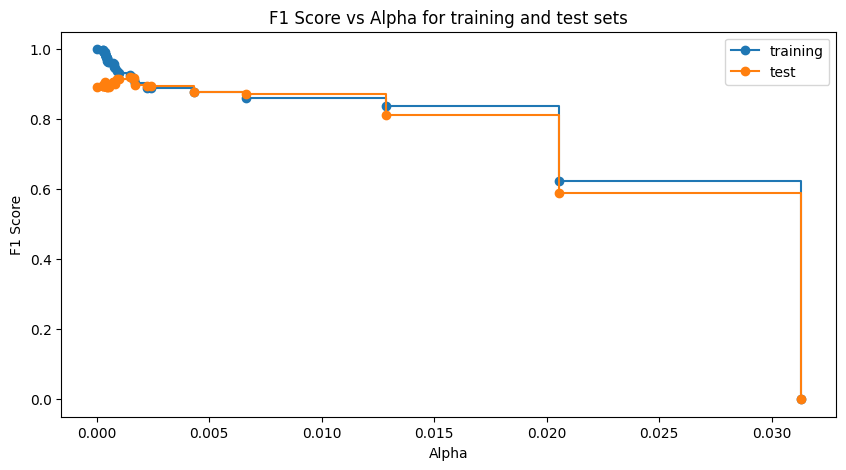

In [ ]:
# Create a figure
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_xlabel("Alpha")  # Set the label for the x-axis
ax.set_ylabel("F1 Score")  # Set the label for the y-axis
ax.set_title("F1 Score vs Alpha for training and test sets")  # Set the title of the plot

# Plot the training F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, train_f1_scores, marker="o", label="training", drawstyle="steps-post")

# Plot the testing F1 scores against alpha, using circles as markers and steps-post style
ax.plot(ccp_alphas, test_f1_scores, marker="o", label="test", drawstyle="steps-post")

ax.legend();  # Add a legend to the plot

In [ ]:
# creating the model where we get highest test F1 Score
index_best_model = np.argmax(test_f1_scores)

# selcting the decision tree model corresponding to the highest test score
dtree_postprun = clfs[index_best_model]
print(dtree_postprun)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0015022145028224059),
                       random_state=42)


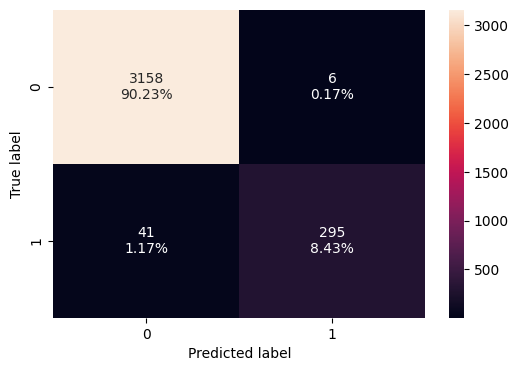

In [ ]:
# to create a confusion matrix for train set
confusion_matrix_sklearn(dtree_postprun, X_train, y_train)

In [ ]:
# to check the classification metrics on test set
dtree_postprun_train_perf = model_performance_classification(dtree_postprun, X_train, y_train)
dtree_postprun_train_perf

,Accuracy,Recall,Precision,F1
0,0.986571,0.877976,0.980066,0.926217


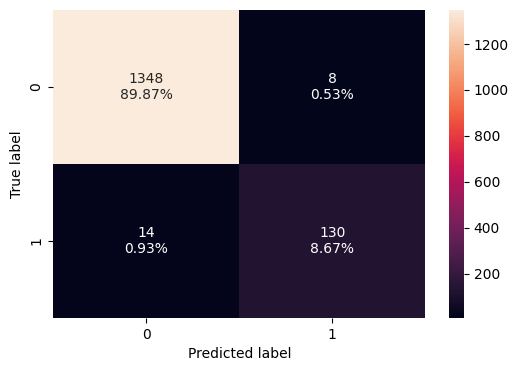

In [ ]:
# to create a confusion matrix for test set
confusion_matrix_sklearn(dtree_postprun, X_test, y_test)

In [ ]:
# to check the classification metrics on test set
dtree_postprun_test_perf = model_performance_classification(dtree_postprun, X_test, y_test)
dtree_postprun_test_perf

,Accuracy,Recall,Precision,F1
0,0.985333,0.902778,0.942029,0.921986


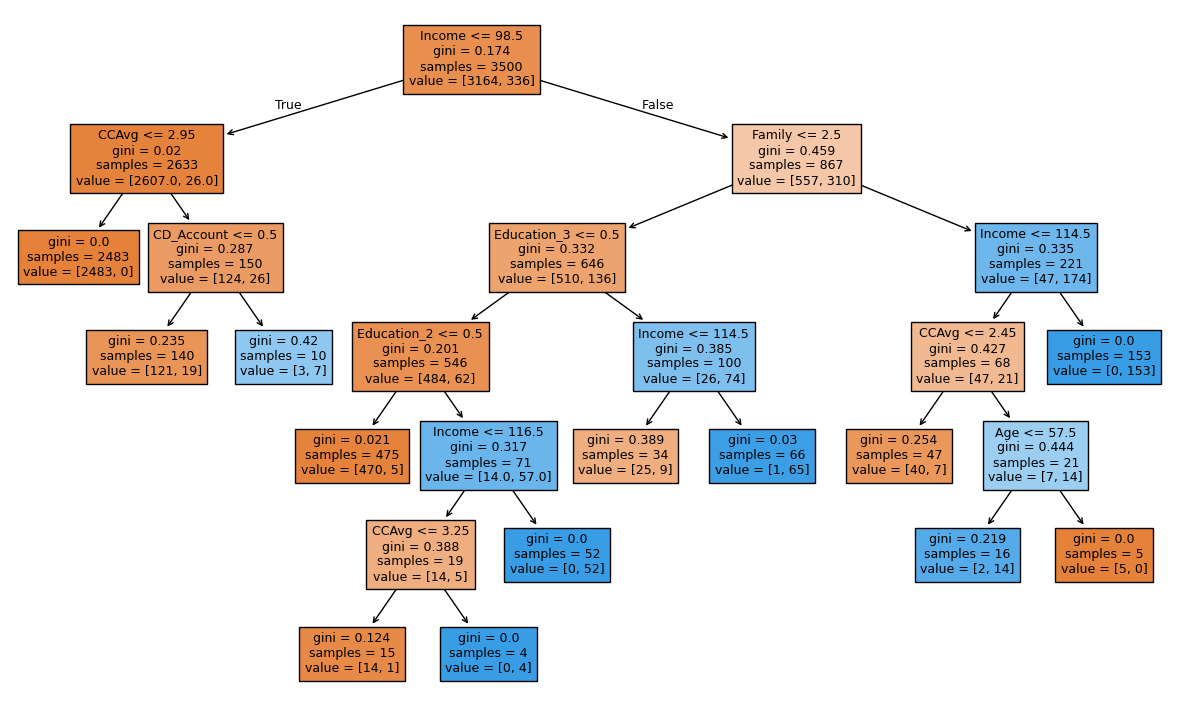

In [ ]:
# list of feature names in X_train
feature_names = list(X_train.columns)

# set the figure size for the plot
plt.figure(figsize=(15, 9))

# plotting the decision tree
out = tree.plot_tree(
    dtree_postprun,                         # decision tree classifier model
    feature_names=feature_names,    # list of feature names (columns) in the dataset
    filled=True,                    # fill the nodes with colors based on class
    fontsize=9,                     # font size for the node text
    node_ids=False,                 # do not show the ID of each node
    class_names=None,               # whether or not to display class names
)

# add arrows to the decision tree splits if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")    # set arrow color to black
        arrow.set_linewidth(1)          # set arrow linewidth to 1

# displaying the plot
plt.show()

In [ ]:
# printing a text report showing the rules of a decision tree
print(
    tree.export_text(
        dtree_postprun,    # specify the model
        feature_names=feature_names,    # specify the feature names
        show_weights=True    # specify whether or not to show the weights associated with the model
    )
)

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2483.00, 0.00] class: 0.0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [121.00, 19.00] class: 0.0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [3.00, 7.00] class: 1.0
|--- Income >  98.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [470.00, 5.00] class: 0.0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- Income <= 116.50
|   |   |   |   |   |--- CCAvg <= 3.25
|   |   |   |   |   |   |--- weights: [14.00, 1.00] class: 0.0
|   |   |   |   |   |--- CCAvg >  3.25
|   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1.0
|   |   |   |   |--- Income >  116.50
|   |   |   |   |   |--- weights: [0.00, 52.00] class: 1.0
|   |   |--- Education_3 >  0.50
|   |   |   |--- Income <= 114.50
|   |   |   |   |--- weights: [25.00, 9.00] class: 0.0
|   |   |   |--- Income >  114.50
|   |   |   |  

## Model Performance Comparison and Final Model Selection

#### Comparing Testing performance

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        dtree_train_perf.T,
        dtree_preprun_train_perf.T,
        dtree_postprun_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.981429,0.986571
Recall,1.0,0.880952,0.877976
Precision,1.0,0.922118,0.980066
F1,1.0,0.901065,0.926217


In [ ]:
# test performance comparison

models_test_comp_df = pd.concat(
    [
        dtree_test_perf.T,
        dtree_preprun_test_perf.T,
        dtree_postprun_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree (sklearn default)",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree (sklearn default),Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.979333,0.980000,0.985333
Recall,0.895833,0.944444,0.902778
Precision,0.889655,0.860759,0.942029
F1,0.892734,0.900662,0.921986


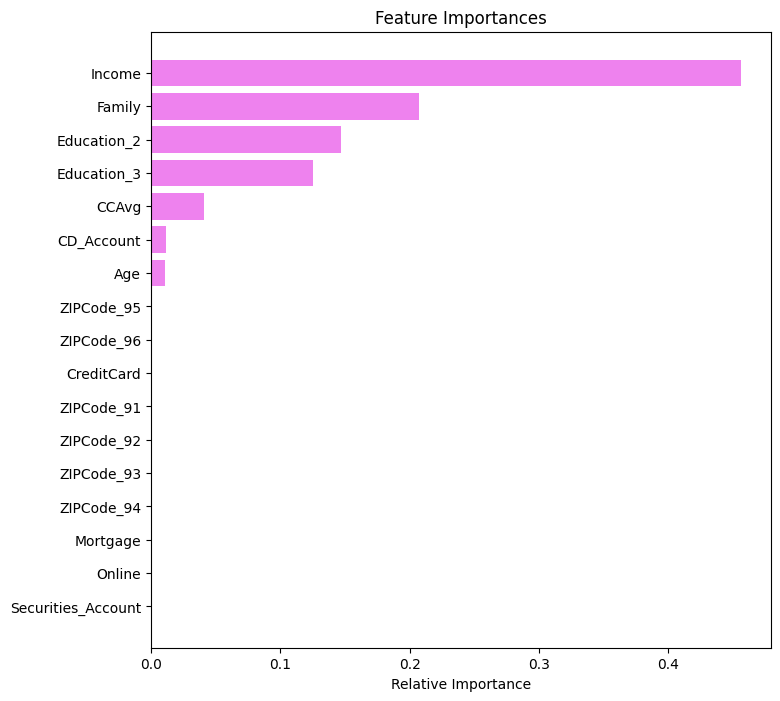

In [ ]:
# importance of features in the tree building
importances = dtree_postprun.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Observation:
* Pre Pruned Decision Tree has the precision score = 86%, Recall = 94% and F1=90% with test data.
* Post Pruned Decision Tree has the precision score = 94%, Recall = 90% and F1=92% with test data.
* Post Pruned decision tree is recommended model as it has performed very well with test data. It shows the best balance between test accuracy, recall, precision and F1 scores. Although recall is slightly lower than Pre Pruned, the higher precision and F1 score make it more robust as it avoids overfitting, as evident from its consistent performance across training and test sets.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* Post Pruned model offers the best F1 and percision which means fewer false positives and better efficieny in campaign targeting.
* From the decision trees, Factors such as income, family size, and education level all play a part in predicting whether customers will take loans from the bank.
* Focus on high income segments (Income >= 98.5k) as Income is the strongest predictor of persoanl loan acceptance. Customize marketing content on personal loan benefits.
* Prioritize Families over single as Family size has a strong positive impact - possible due to larger financial needs. Highlight how loans can help with education, home improvement or family needs.
* Graduate and Professional education levels show higher loan acceptance, so personalize campaigns tailored for educated customers by using language in ads that appeals to finanically savvy and career-oriented individuals.
* Segment based on Spending behaviour (CCAvg) of customers, Target customers with higher credit card spending. Offer pre-approved loans, rewards or lower interest rates ties to spending threshold.
* Customers who typically have a higher income, larger family size, or higher educational levels are more likely to take out loans from the bank.
* This model can help the bank to create a targeted marketing polices based on the category in which the customer falls and plans made specifially for these customers.
* Periodically monitor and reassess the models as the Customer behaviour changes over time.

___